# Part 1

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\04 Instacart Project'

In [3]:
df_orders_products = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products.pkl'))

In [4]:
df_orders_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  busiest_day             object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
dtypes: float64(2), int64(11), object(5)
memory usage: 4.6+ GB


In [5]:
df_user_stats_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'user_stats_customers_merged.pkl'))

In [6]:
df_user_stats_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             206209 non-null  int64  
 1   price_avg           206209 non-null  float64
 2   spending_avg        206209 non-null  object 
 3   frequency_mean      206209 non-null  float64
 4   customer_frequency  206209 non-null  object 
 5   STATE               206209 non-null  object 
 6   Age                 206209 non-null  int64  
 7   num_dependants      206209 non-null  int64  
 8   fam_status          206209 non-null  object 
 9   income              206209 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 17.3+ MB


## #2. Security Concerns

All PII data was previously removed from the data sets. All first and last names were removed from the df_user_stats_customers dataset.

## #3. Region Column

Creating a region column based on the state column, do not need to create divisions

Region 1: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey

Region 2: Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri

Region 3: Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana

Region 4: Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii 


In [7]:
#Making lists for each region for an if else statement
Region1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [8]:
Region2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [9]:
Region3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [10]:
Region4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'] 

In [11]:
#If else statement which assigns Region values to each list
def region(row):

  if row['STATE'] in Region1:
    return 'Region 1'
  elif row['STATE'] in Region2:
    return 'Region 2'
  elif row['STATE'] in Region3:
    return 'Region 3'
  elif row['STATE'] in Region4:
    return 'Region 4'
  else: return 'Not enough data'

In [12]:
#Creating new region column
df_user_stats_customers['region'] = df_user_stats_customers.apply(region, axis=1)

In [13]:
#Checking for any missing values in region column
df_user_stats_customers['region'].value_counts(dropna = False)

Region 3    68737
Region 4    52565
Region 2    48519
Region 1    36388
Name: region, dtype: int64

In [14]:
#Creating new dataframes for each region to learn about spending habits
df_user_stats_customers_region1 = df_user_stats_customers[df_user_stats_customers['region'] == 'Region 1']

In [15]:
df_user_stats_customers_region2 = df_user_stats_customers[df_user_stats_customers['region'] == 'Region 2']

In [16]:
df_user_stats_customers_region3 = df_user_stats_customers[df_user_stats_customers['region'] == 'Region 3']

In [17]:
df_user_stats_customers_region4 = df_user_stats_customers[df_user_stats_customers['region'] == 'Region 4']

In [18]:
#Checking new dataframes' output
df_user_stats_customers_region1['region'].value_counts(dropna = False)

Region 1    36388
Name: region, dtype: int64

In [19]:
df_user_stats_customers_region2['region'].value_counts(dropna = False)

Region 2    48519
Name: region, dtype: int64

In [20]:
df_user_stats_customers_region3['region'].value_counts(dropna = False)

Region 3    68737
Name: region, dtype: int64

In [21]:
df_user_stats_customers_region4['region'].value_counts(dropna = False)

Region 4    52565
Name: region, dtype: int64

In [22]:
#Checking customer spending habits by using spending avg column
df_user_stats_customers_region1['spending_avg'].value_counts(dropna = False)

Low spender     35502
High spender      886
Name: spending_avg, dtype: int64

In [23]:
df_user_stats_customers_region2['spending_avg'].value_counts(dropna = False)

Low spender     47254
High spender     1265
Name: spending_avg, dtype: int64

In [24]:
df_user_stats_customers_region3['spending_avg'].value_counts(dropna = False)

Low spender     66912
High spender     1825
Name: spending_avg, dtype: int64

In [25]:
df_user_stats_customers_region4['spending_avg'].value_counts(dropna = False)

Low spender     51166
High spender     1399
Name: spending_avg, dtype: int64

## #4. Excluding low activity customers

In [26]:
#Creating activity flag
df_orders_products['order_count'] = df_orders_products.groupby(['user_id'])['order_number'].transform('count')

In [27]:
#Checking order_count column output
df_orders_products.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_count
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,59
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Regularly busy,Least busiest days,Average orders,10,New customer,59
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Regularly busy,Least busiest days,Most orders,10,New customer,59
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Least busy,Least busiest days,Average orders,10,New customer,59
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Least busy,Least busiest days,Most orders,10,New customer,59


In [28]:
#For loop for new activity column
flag = []

for value in df_orders_products['order_count']:
  if value < 5:
    flag.append("Low Activity")
  else:
    flag.append("High Activity")

In [29]:
#Adding new activity column based on flag for loop
df_orders_products['activity'] = flag

In [30]:
#Creating new dataframe without Low Activity users
df_orders_products_new = df_orders_products[df_orders_products.activity != 'Low Activity']

In [31]:
#Checking activity column output
df_orders_products_new['activity'].value_counts(dropna = False)

High Activity    32431337
Name: activity, dtype: int64

In [32]:
df_orders_products_new.shape

(32431337, 20)

In [33]:
#Comparing to old dataframe
df_orders_products.shape

(32434212, 20)

## #5. Profiling Variable

Customer Profiles

Single non-parent adult
Married non-parent adult

Single parent adult
Married parent adult

Single non-parent senior
Married non-parent senior

Single parent senior
Married parent senior

The following variables from df_user_stats_customers will be used to determine the profile: Age, num_dependants, and fam_status

Senior age is 62 and older.

In [34]:
#Creating customer profile column using loc functions
df_user_stats_customers.loc[(df_user_stats_customers['Age'] < 62) & (df_user_stats_customers['num_dependants'] == 0) & (df_user_stats_customers['fam_status'] != 'married'), 'customer_profile'] = 'Single Non-Parent Adult'
df_user_stats_customers.loc[(df_user_stats_customers['Age'] < 62) & (df_user_stats_customers['num_dependants'] == 0) & (df_user_stats_customers['fam_status'] == 'married'), 'customer_profile'] = 'Married Non-Parent Adult'

df_user_stats_customers.loc[(df_user_stats_customers['Age'] < 62) & (df_user_stats_customers['num_dependants'] > 0) & (df_user_stats_customers['fam_status'] != 'married'), 'customer_profile'] = 'Single Parent Adult'
df_user_stats_customers.loc[(df_user_stats_customers['Age'] < 62) & (df_user_stats_customers['num_dependants'] > 0) & (df_user_stats_customers['fam_status'] == 'married'), 'customer_profile'] = 'Married Parent Adult'

df_user_stats_customers.loc[(df_user_stats_customers['Age'] >= 62) & (df_user_stats_customers['num_dependants'] == 0) & (df_user_stats_customers['fam_status'] != 'married'), 'customer_profile'] = 'Single Non-Parent Senior'
df_user_stats_customers.loc[(df_user_stats_customers['Age'] >= 62) & (df_user_stats_customers['num_dependants'] == 0) & (df_user_stats_customers['fam_status'] == 'married'), 'customer_profile'] = 'Married Non-Parent Senior'

df_user_stats_customers.loc[(df_user_stats_customers['Age'] >= 62) & (df_user_stats_customers['num_dependants'] > 0) & (df_user_stats_customers['fam_status'] != 'married'), 'customer_profile'] = 'Single Parent Senior'
df_user_stats_customers.loc[(df_user_stats_customers['Age'] >= 62) & (df_user_stats_customers['num_dependants'] > 0) & (df_user_stats_customers['fam_status'] == 'married'), 'customer_profile'] = 'Married Parent Senior'

In [35]:
#Checking customer_profile column output
df_user_stats_customers.head()

,user_id,price_avg,spending_avg,frequency_mean,customer_frequency,STATE,Age,num_dependants,fam_status,income,region,customer_profile
0,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,Region 3,Married Parent Adult
1,2,7.515897,Low spender,14.902564,Regular customer,Alaska,68,3,married,64940,Region 4,Married Parent Senior
2,3,8.197727,Low spender,10.181818,Regular customer,Arizona,33,3,married,93240,Region 4,Married Parent Adult
3,4,8.205556,Low spender,11.944444,Regular customer,Arkansas,31,3,married,45435,Region 3,Married Parent Adult
4,5,9.189189,Low spender,10.189189,Regular customer,California,75,0,divorced/widowed,115242,Region 4,Single Non-Parent Senior


In [36]:
df_user_stats_customers['customer_profile'].value_counts()

Married Parent Adult        96554
Married Parent Senior       48352
Single Non-Parent Adult     35529
Single Non-Parent Senior    16073
Single Parent Adult          9701
Name: customer_profile, dtype: int64

## #6. Profile Visualization

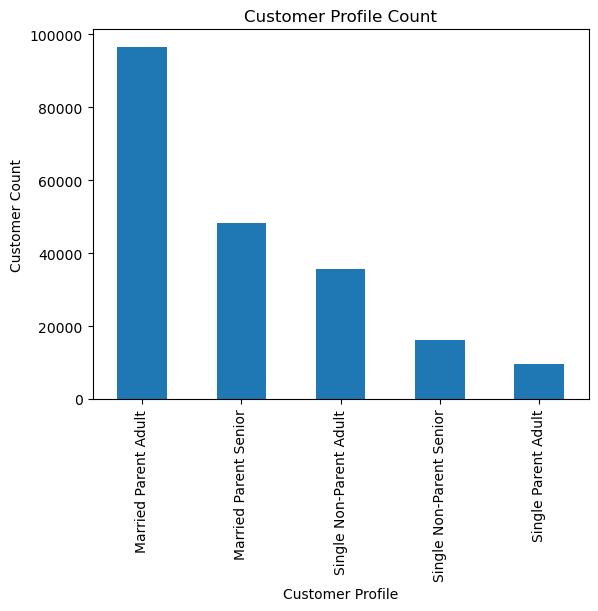

In [37]:
#Bar graph of customer_profile column
customer_profile_bar = df_user_stats_customers['customer_profile'].value_counts().plot.bar()
plt.title('Customer Profile Count')
plt.xlabel('Customer Profile')
plt.ylabel('Customer Count')
plt.savefig('Customer Profile Count', bbox_inches='tight', dpi = 1000)

## #7. Customer Profile Stats

In [38]:
#Mean, min, max for price_avg, average a customer spends per purchase, grouped by customer_profile variable
df_user_stats_customers.groupby('customer_profile').agg({'price_avg': ['mean', 'min', 'max']})

price_avg                   
                               mean  min           max
customer_profile                                      
Married Parent Adult      12.421400  1.0  12506.925000
Married Parent Senior     12.106579  1.0   8703.400000
Single Non-Parent Adult   13.886906  1.0  25005.425000
Single Non-Parent Senior  12.140035  1.2  14042.512281
Single Parent Adult       11.898692  1.3  10209.987755

Single Non-Parent Adults spend the most money as opposed to Single Parent Adults who spend the least.

In [39]:
#Mean, min, max for price_avg, average a between a customer's visits, grouped by customer_profile variable
df_user_stats_customers.groupby('customer_profile').agg({'frequency_mean': ['mean', 'min', 'max']})

frequency_mean                
                                   mean  min        max
customer_profile                                       
Married Parent Adult          13.031670  0.0  29.702970
Married Parent Senior         12.994993  0.0  29.464286
Single Non-Parent Adult       13.029726  0.0  29.425287
Single Non-Parent Senior      12.942492  0.0  29.318182
Single Parent Adult           12.986004  0.0  29.500000

Single Non-Parent Seniors go to the store most often as opposed to Married Parent Adults who go to the store the least.

## #8. Customer Profiles: Regions and Departments Stats

## Customer Profile Count based on region

In [40]:
#Joining the df_user_stats_customers and df_orders_products_new dataframes
df_user_stats_customers_and_orders_products = df_user_stats_customers.merge(df_orders_products_new , on = ['user_id'], indicator = True)

In [41]:
df_user_stats_customers_and_orders_products.head()

,user_id,price_avg,spending_avg,frequency_mean,customer_frequency,STATE,Age,num_dependants,fam_status,income,...,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_count,activity,_merge
0,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,59,High Activity,both
1,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Least busiest days,Average orders,10,New customer,59,High Activity,both
2,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Least busiest days,Most orders,10,New customer,59,High Activity,both
3,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Least busy,Least busiest days,Average orders,10,New customer,59,High Activity,both
4,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Least busy,Least busiest days,Most orders,10,New customer,59,High Activity,both


In [42]:
df_user_stats_customers_and_orders_products.dtypes

user_id                      int64
price_avg                  float64
spending_avg                object
frequency_mean             float64
customer_frequency          object
STATE                       object
Age                          int64
num_dependants               int64
fam_status                  object
income                       int64
region                      object
customer_profile            object
order_id                     int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag        

In [43]:
df_user_stats_customers_and_orders_products.shape

(32431337, 32)

In [44]:
#Checking output for merged dataframe
df_user_stats_customers_and_orders_products.loc[df_user_stats_customers_and_orders_products['user_id'] == 1]

,user_id,price_avg,spending_avg,frequency_mean,customer_frequency,STATE,Age,num_dependants,fam_status,income,...,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_count,activity,_merge
0,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,59,High Activity,both
1,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Least busiest days,Average orders,10,New customer,59,High Activity,both
2,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Least busiest days,Most orders,10,New customer,59,High Activity,both
3,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Least busy,Least busiest days,Average orders,10,New customer,59,High Activity,both
4,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Least busy,Least busiest days,Most orders,10,New customer,59,High Activity,both
5,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,59,High Activity,both
6,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Busiest days,Most orders,10,New customer,59,High Activity,both
7,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Busiest days,Most orders,10,New customer,59,High Activity,both
8,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Regularly busy,Busiest days,Most orders,10,New customer,59,High Activity,both
9,1,6.367797,Low spender,18.542373,Regular customer,Alabama,31,3,married,40423,...,7,9.0,Least busy,Least busiest days,Average orders,10,New customer,59,High Activity,both


Region 3    68737
Region 4    52565
Region 2    48519
Region 1    36388

In [45]:
#Comparing customer_profiles within different regions
df_user_stats_customers_and_orders_products.groupby(['customer_profile', 'region']).agg({'region': ['count']})

region
                                     count
customer_profile         region           
Married Parent Adult     Region 1  2686202
                         Region 2  3555632
                         Region 3  5050092
                         Region 4  3901974
Married Parent Senior    Region 1  1353617
                         Region 2  1774054
                         Region 3  2516511
                         Region 4  1936839
Single Non-Parent Adult  Region 1   962309
                         Region 2  1315306
                         Region 3  1873844
                         Region 4  1430894
Single Non-Parent Senior Region 1   457284
                         Region 2   591495
                         Region 3   830077
                         Region 4   643235
Single Parent Adult      Region 1   268466
                         Region 2   366755
                         Region 3   530000
                         Region 4   386751

In [46]:
customer_profile_region_count = df_user_stats_customers_and_orders_products.groupby(['customer_profile', 'region']).agg(customer_profile_count = ('region', 'count'))

In [47]:
bar_customer_profile_region = customer_profile_region_count.sort_values('customer_profile_count', ascending = False)

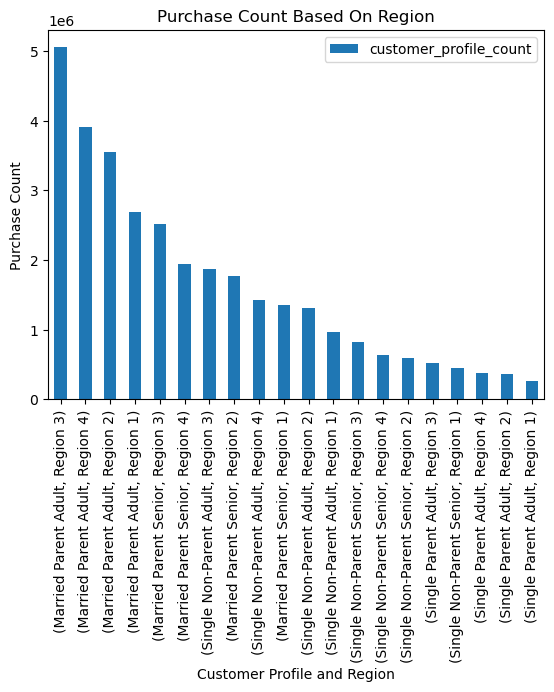

In [48]:
#Bar graph counting number of region instances based on customer profile and region
#The largest group is Maried Parent Adults from Region 3
#Ordered version
bar_customer_profile_region_finished = bar_customer_profile_region.plot.bar()
plt.title('Purchase Count Based On Region')
plt.xlabel('Customer Profile and Region')
plt.ylabel('Purchase Count')
plt.savefig('Purchase Count Based On Region', bbox_inches='tight', dpi = 1000)

In [49]:
#Correct data frame will need to round dataframe
agg_data = df_user_stats_customers_and_orders_products.groupby(['customer_profile', 'region']).agg(region_count=('region', 'count')).reset_index()

In [50]:
sorted_data = agg_data.sort_values(by='region_count', ascending=False)

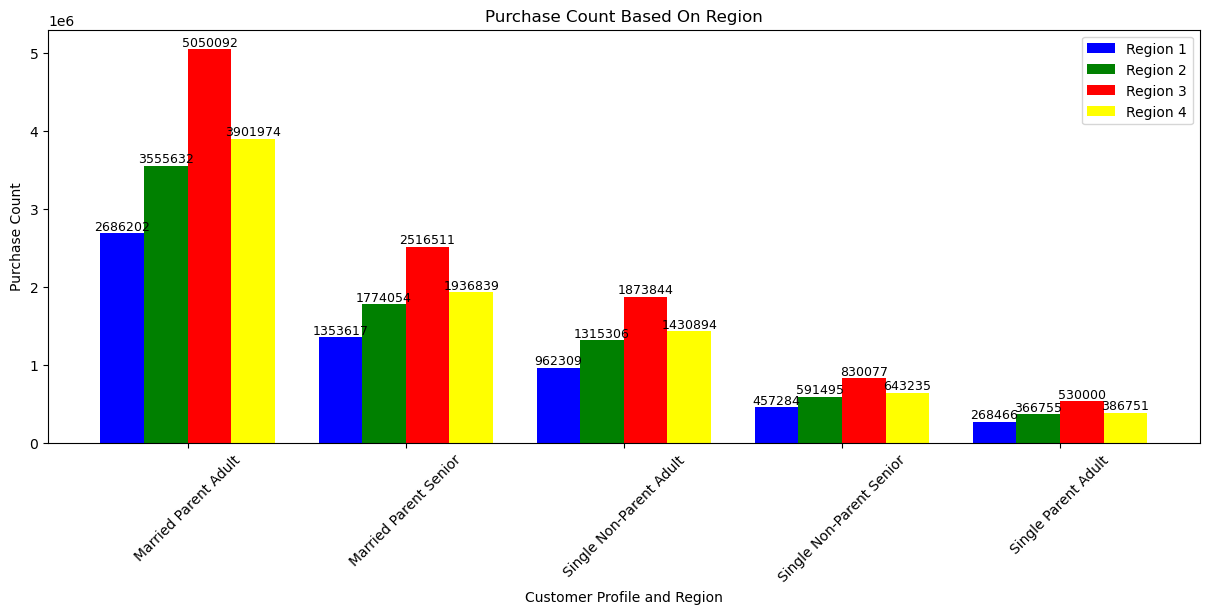

In [51]:
color_map = {
'Region 1': 'blue',
'Region 2': 'green',
'Region 3': 'red',
'Region 4': 'yellow'
}
#Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

#List of unique customer profiles
profiles = sorted_data['customer_profile'].unique()

#Width of each bar
bar_width = 0.2

#Create an array for bar positions
ind = np.arange(len(profiles))

#Loop through each region and adjust the bar's position accordingly
for i, (region, color) in enumerate(color_map.items()):
    # Filter data for the specific region
    region_data = sorted_data[sorted_data['region'] == region]
    # Create a list of y-values for each customer profile
    y_values = [region_data[region_data['customer_profile'] == profile]['region_count'].values[0] if profile in region_data['customer_profile'].values else 0 for profile in profiles]
    # Plot bars for this region
    bars = ax.bar(ind + i * bar_width, y_values, bar_width, label=region, color=color)

    # Add data labels to each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval, 2), ha='center', va='bottom', fontsize=9)
        
#Set the x-axis ticks and labels
ax.set_xticks(ind + 1.5 * bar_width)
ax.set_xticklabels(profiles, rotation=45)

ax.legend()

plt.tight_layout()
plt.title('Purchase Count Based On Region')
plt.xlabel('Customer Profile and Region')
plt.ylabel('Purchase Count')
plt.show()

In [52]:
#Dataframe with only single instances of each user id to count number of unique loyalty flags
unique_user_id = df_user_stats_customers_and_orders_products.drop_duplicates('user_id')

In [53]:
bar_customer_profile_unique = unique_user_id.value_counts('customer_profile')

In [54]:
#Customer loyalty flag count
customer_profile_loyalty_count = unique_user_id.groupby(['customer_profile', 'loyalty_flag']).agg(loyalty_flag_count = ('user_id', 'count'))

In [55]:
bar_customer_profile_loyalty_count = customer_profile_loyalty_count.sort_values('loyalty_flag_count', ascending = False)

In [56]:
bar_customer_profile_loyalty_count

loyalty_flag_count
customer_profile         loyalty_flag                        
Married Parent Adult     New customer                   52366
                         Regular customer               35901
Married Parent Senior    New customer                   26024
Single Non-Parent Adult  New customer                   19236
Married Parent Senior    Regular customer               18123
Single Non-Parent Adult  Regular customer               13202
Single Non-Parent Senior New customer                    8688
Married Parent Adult     Loyal customer                  7914
Single Non-Parent Senior Regular customer                6002
Single Parent Adult      New customer                    5219
Married Parent Senior    Loyal customer                  4026
Single Parent Adult      Regular customer                3636
Single Non-Parent Adult  Loyal customer                  2949
Single Non-Parent Senior Loyal customer                  1318
Single Parent Adult      Loyal customer                   810

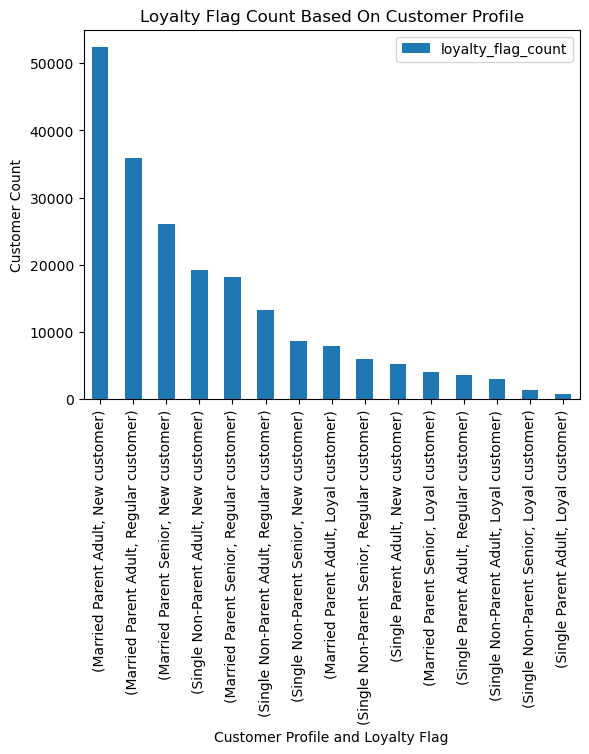

In [57]:
#Most of the largest demographic, Married Parent Adults, are new customers
bar_customer_profile_loyalty_count_finished = bar_customer_profile_loyalty_count.plot.bar()
plt.title('Loyalty Flag Count Based On Customer Profile')
plt.xlabel('Customer Profile and Loyalty Flag')
plt.ylabel('Customer Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty Flag Count Based On Customer Profile'), bbox_inches='tight')

I will look into the statistics of Married Parent Adults, since they are the biggest demographic. Then I will go in depth with the Married Parent Adults in Region 3 and see if their trends are ubiquitous.

In [58]:
#Customer profile count based on department id and customer profile
df_user_stats_customers_and_orders_products.groupby(['department_id','customer_profile']).agg({'customer_profile': ['count']})

customer_profile
                                                  count
department_id customer_profile                         
1             Married Parent Adult              1045676
              Married Parent Senior              524429
              Single Non-Parent Adult            380838
              Single Non-Parent Senior           176688
              Single Parent Adult                108598
...                                                 ...
21            Married Parent Adult                32376
              Married Parent Senior               16107
              Single Non-Parent Adult             12114
              Single Non-Parent Senior             4974
              Single Parent Adult                  3571

[105 rows x 1 columns]

#Department id count based on region
region_department_id_count = df_user_stats_customers_and_orders_products.groupby(['region','department_id']).agg(department_count = ('department_id', 'count'))

bar_region_department_id_count = region_department_id_count.sort_values('department_count', ascending = False)

#Top 5 department id count based on region
bar_region_department_id_count.head()

## Counting Department ID based on regions

In [59]:
#Overall purchases for all regions combined
df_user_stats_customers_and_orders_products.groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False)

,department_count
department_id,
4,9478768
16,5413663
19,2887289
7,2687421
1,2236229
13,1875426
3,1176717
15,1068013
20,1051193


Text(0, 0.5, 'Number of Orders')

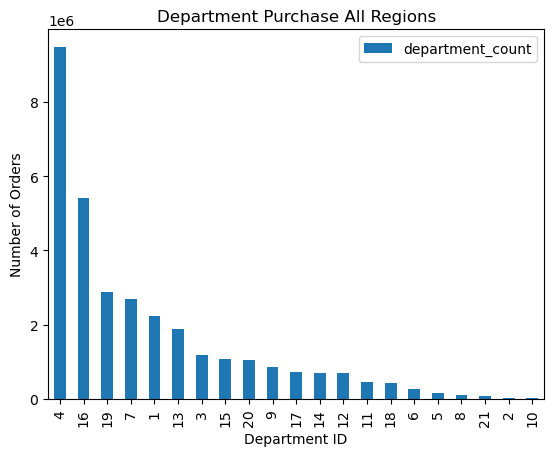

In [60]:
department_count_all_bar = df_user_stats_customers_and_orders_products.groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False).plot.bar()
plt.title('Department Purchase All Regions')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')

In [61]:
#Department_id count based on region 1
df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 1' ].groupby(['department_id']).agg({'department_id': ['count']})

,department_id
,count
department_id,
1,391280
2,6585
3,209460
4,1665766
5,26549
6,46890
7,483252
8,18601


In [62]:
#Department_id count based on region 1 in descending order
department_id_count_region_1 = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 1' ].groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False)

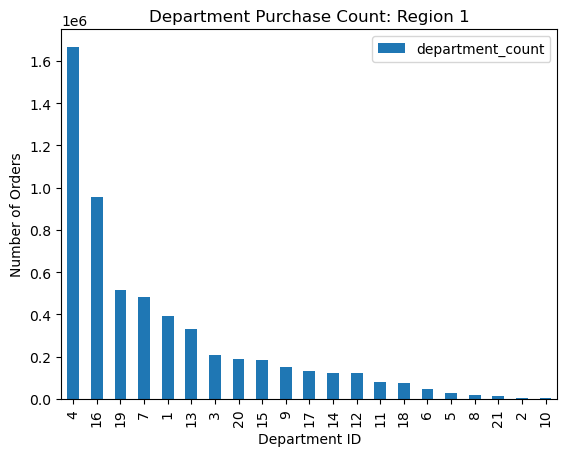

In [63]:
department_id_count_region_1_finished = department_id_count_region_1.plot.bar()
plt.title('Department Purchase Count: Region 1')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.savefig('Loyalty Flag Count Based On Customer Profile', bbox_inches='tight', dpi = 1000)

In [64]:
#Department_id count based on region 2
df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 2' ].groupby(['department_id']).agg({'department_id': ['count']})

,department_id
,count
department_id,
1,524373
2,8420
3,274766
4,2227830
5,36187
6,63734
7,625426
8,22356


In [65]:
#Department_id count based on region 2 in descending order
department_id_count_region_2 = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 2' ].groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False)

Text(0, 0.5, 'Number of Orders')

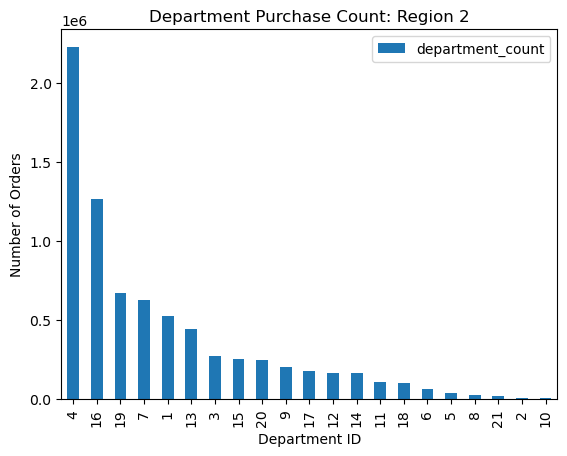

In [66]:
department_id_count_region_2_finished = department_id_count_region_2.plot.bar()
plt.title('Department Purchase Count: Region 2')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')

In [67]:
#Department_id count based on region 3
df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 3' ].groupby(['department_id']).agg({'department_id': ['count']})

,department_id
,count
department_id,
1,748376
2,12206
3,390262
4,3160339
5,51610
6,89138
7,898712
8,31270


In [68]:
#Department_id count based on region 3 in descending order
department_id_count_region_3 = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 3' ].groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False)

Text(0, 0.5, 'Number of Orders')

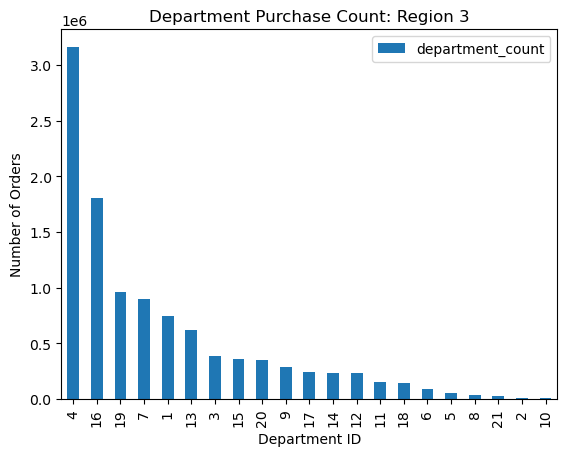

In [69]:
department_id_count_region_3_finished = department_id_count_region_3.plot.bar()
plt.title('Department Purchase Count: Region 3')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')

In [70]:
#Department_id count based on region 4 
df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 4' ].groupby(['department_id']).agg({'department_id': ['count']})

,department_id
,count
department_id,
1,572200
2,9072
3,302229
4,2424833
5,39332
6,69482
7,680031
8,25491


In [71]:
#Department_id count based on region 4 in descending order
department_id_count_region_4 = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 4' ].groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False)

Text(0, 0.5, 'Number of Orders')

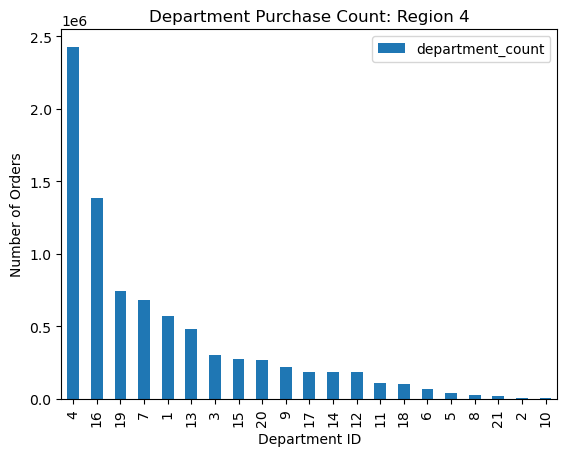

In [72]:
department_id_count_region_4_finished = department_id_count_region_4.plot.bar()
plt.title('Department Purchase Count: Region 4')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')

Department popularity is mostly uniform across all the four regions. Department 4, produce, is the most popular. Department 10, bulk, is the least popular. 

In [73]:
#Customer profile distrubution based on department id and region
df_user_stats_customers_and_orders_products.groupby(['customer_profile','department_id', 'region' ]).agg({'customer_profile': ['count']})

customer_profile
                                                       count
customer_profile     department_id region                   
Married Parent Adult 1             Region 1           182880
                                   Region 2           246507
                                   Region 3           348579
                                   Region 4           267710
                     2             Region 1             2864
...                                                      ...
Single Parent Adult  20            Region 4            11830
                     21            Region 1              584
                                   Region 2              865
                                   Region 3             1186
                                   Region 4              936

[420 rows x 1 columns]

In [74]:
df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.region == 'Region 1' ].groupby(['customer_profile','department_id']).agg({'customer_profile': ['count']})

customer_profile
                                              count
customer_profile     department_id                 
Married Parent Adult 1                       182880
                     2                         2864
                     3                        97479
                     4                       785031
                     5                        12161
...                                             ...
Single Parent Adult  17                        6105
                     18                        3281
                     19                       24481
                     20                        8972
                     21                         584

[105 rows x 1 columns]

## Married Adult Parent from Region 3 statistics

In [75]:
#New dataframe from the most popular customer demographic: Married Parent Adults from Region 3
df_MPA_R3 = df_user_stats_customers_and_orders_products[(df_user_stats_customers_and_orders_products['customer_profile'] == 'Married Parent Adult') &  (df_user_stats_customers_and_orders_products['region'] == 'Region 3')]

In [76]:
df_MPA_R3.groupby(['department_id']).agg({'customer_profile': ['count']}).sort_index()

,customer_profile
,count
department_id,
1,348579
2,5682
3,181877
4,1485301
5,23681
6,41567
7,415600
8,14343


Department ID legend: 
1 frozen
2 other
3 bakery
4 produce
5 alcohol
6 international
7 beverages
8 pets
9 dry goods pasta
10 bulk
11 personal care
12 meat seafood
13 pantry
14 breakfast
15 canned goods
16 dairy eggs
17 household
18 babies
19 snacks 
20 deli
21 missing

In [77]:
# New dataframe for just a customer_profile count (each purchase that was ever made) grouped by department id
# Will show how popular each department's products are
df_MPA_R3_dept_count = df_MPA_R3.groupby(['department_id']).agg(department_count=('customer_profile', 'count'))

In [78]:
# New dataframe, df_MPA_R3_dept_count but sorted in decending order
bar_MPA_R3_dept_count = df_MPA_R3_dept_count.sort_values('department_count', ascending=False)

In [79]:
bar_MPA_R3_dept_count

,department_count
department_id,
4,1485301
16,844167
19,443985
7,415600
1,348579
13,292287
3,181877
15,166520
20,160970


Text(0, 0.5, 'Number of Orders')

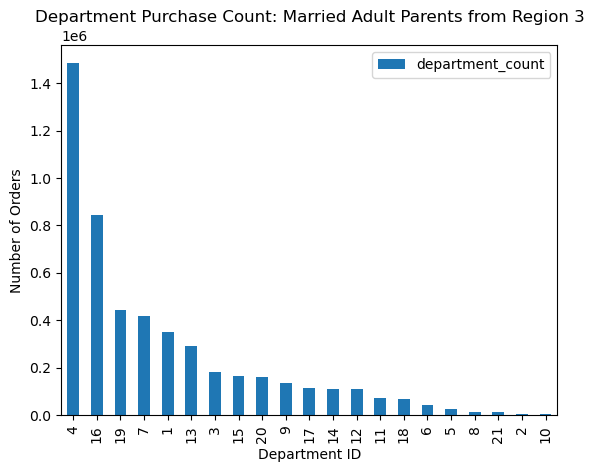

In [80]:
# bar3 plotted out showing department 4, produce, is the most popular by a significant margin
bar_MPA_R3_dept_count_finished = bar_MPA_R3_dept_count.plot.bar()
plt.title('Department Purchase Count: Married Adult Parents from Region 3')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')

In [81]:
# New dataframe for just a orders_day_of_week count (each purchase that was ever made) grouped by department id
# Will show which day most customers show up
df_MPA_R3_day_count = df_MPA_R3.groupby(['orders_day_of_week']).agg(day_count=('customer_profile', 'count'))

In [82]:
bar_MPA_R3_day_count = df_MPA_R3_day_count.sort_values('day_count', ascending=False)

In [83]:
bar_MPA_R3_day_count

,day_count
orders_day_of_week,
0,961447
1,881847
6,708644
2,654983
5,654963
3,602117
4,586091


Text(0, 0.5, 'Number of Orders')

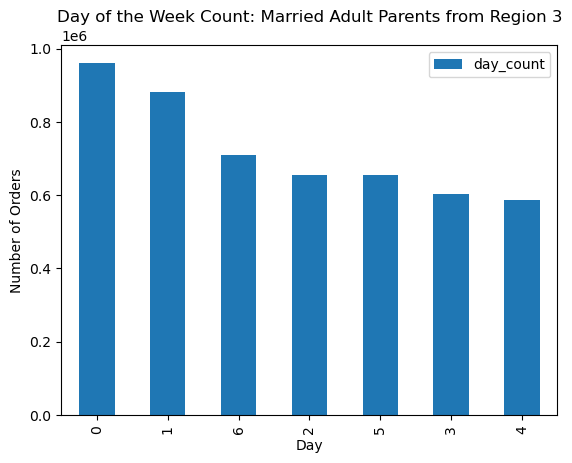

In [84]:
bar_MPA_R3_day_count_finished = bar_MPA_R3_day_count.plot.bar()
plt.title('Day of the Week Count: Married Adult Parents from Region 3')
plt.xlabel('Day')
plt.ylabel('Number of Orders')

The most popular demographic takes up 47% of department 4's purchases. Region 3's total department 4 purchases are 3160339, and 1485301 is 47%. The least popular department is 10, bulk. 

The most popular day to shop is Saturday, 0, likely when parents have time during the weekend. The least popular is Wednesday.

In [85]:
#Dataframe which excludes Married Parent Adults 
df_No_MPA_R3 = df_user_stats_customers_and_orders_products[ ~(df_user_stats_customers_and_orders_products['customer_profile'].str.contains('Married Parent Adult') & df_user_stats_customers_and_orders_products['region'].str.contains('Region 3')) ]

In [86]:
df_No_MPA_R3.value_counts('region')

region
Region 4    8299693
Region 2    7603242
Region 3    5750432
Region 1    5727878
dtype: int64

In [87]:
df_user_stats_customers_and_orders_products.value_counts('region')

region
Region 3    10800524
Region 4     8299693
Region 2     7603242
Region 1     5727878
dtype: int64

In [88]:
df_MPA_R3.value_counts('region')

region
Region 3    5050092
dtype: int64

df_No_MPA_R3 was made correctly as df_user_stats_customers_and_orders_products' Region 3 count, the dataframe with all purchases, minus df_MPA_R3's Region 3 count, the dataframe with purchases only from Married Parent Adults from Region 3, is equal to df_No_MPA_R3's Region 3

## Statistics excluding Married Adult Parents from Region 3

In [89]:
df_No_MPA_R3_dept_count = df_No_MPA_R3.groupby(['department_id']).agg(department_count=('customer_profile', 'count'))

In [90]:
bar_No_MPA_R3_dept_count = df_No_MPA_R3_dept_count.sort_values('department_count', ascending=False)

In [91]:
bar_No_MPA_R3_dept_count

,department_count
department_id,
4,7993467
16,4569496
19,2443304
7,2271821
1,1887650
13,1583139
3,994840
15,901493
20,890223


Text(0, 0.5, 'Number of Orders')

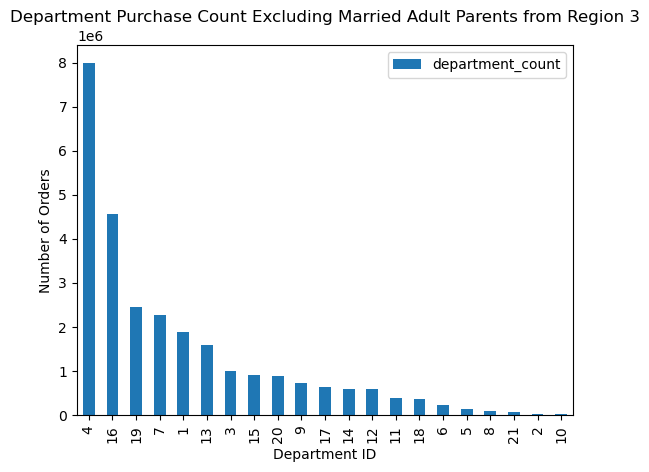

In [92]:
bar_No_MPA_R3_dept_count_finished = bar_No_MPA_R3_dept_count.plot.bar()
plt.title('Department Purchase Count Excluding Married Adult Parents from Region 3')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')

In [93]:
df_No_MPA_R3_day_count = df_No_MPA_R3.groupby(['orders_day_of_week']).agg(day_count=('customer_profile', 'count'))

In [94]:
df_No_MPA_R3_day_count

,day_count
orders_day_of_week,
0,5247763
1,4783446
2,3562396
3,3241571
4,3200749
5,3554080
6,3791240


In [95]:
bar_No_MPA_R3_day_count = df_No_MPA_R3_day_count.sort_values('day_count', ascending=False)

In [96]:
bar_No_MPA_R3_day_count

,day_count
orders_day_of_week,
0,5247763
1,4783446
6,3791240
2,3562396
5,3554080
3,3241571
4,3200749


Text(0, 0.5, 'Number of Orders')

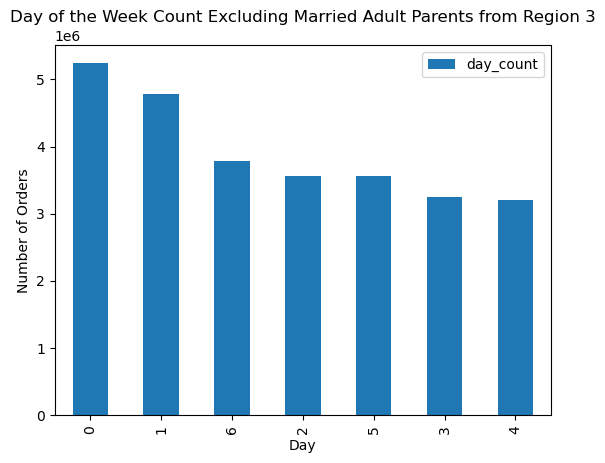

In [97]:
bar_No_MPA_R3_day_count_finished = bar_No_MPA_R3_day_count.plot.bar()
plt.title('Day of the Week Count Excluding Married Adult Parents from Region 3')
plt.xlabel('Day')
plt.ylabel('Number of Orders')

Customers independently follow the same trends as the Married Parent Adults from Region 3 with the exact same order for their statistics in other department purchases and popularity of the day of the week.

In [98]:
customer_profile_price_avg = df_user_stats_customers_and_orders_products.groupby(['customer_profile']).agg(item_price_avg=('prices', 'mean')).sort_values('item_price_avg', ascending=False)

In [99]:
customer_profile_price_avg

,item_price_avg
customer_profile,
Single Non-Parent Adult,12.298818
Married Parent Senior,12.033530
Married Parent Adult,11.993685
Single Non-Parent Senior,11.718234
Single Parent Adult,10.831360


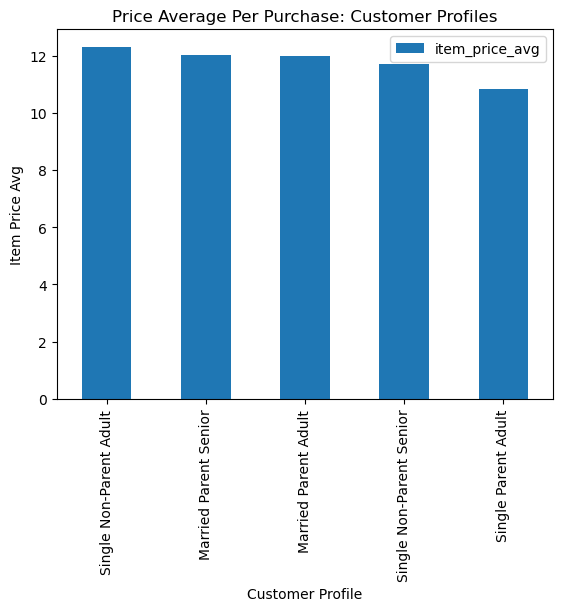

In [100]:
customer_profile_price_avg_bar = customer_profile_price_avg.plot.bar()
plt.title('Price Average Per Purchase: Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Item Price Avg')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price Average Per Purchase Customer Profiles'), bbox_inches='tight')

## Extra Analysis and Visualizations

In [101]:
loyalty_flag_department_count_new = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.loyalty_flag == 'New customer' ].groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False)

In [102]:
loyalty_flag_department_count_new

,department_count
department_id,
4,1736099
16,973936
19,533990
7,512145
1,485452
13,392155
15,236135
3,224327
20,205694


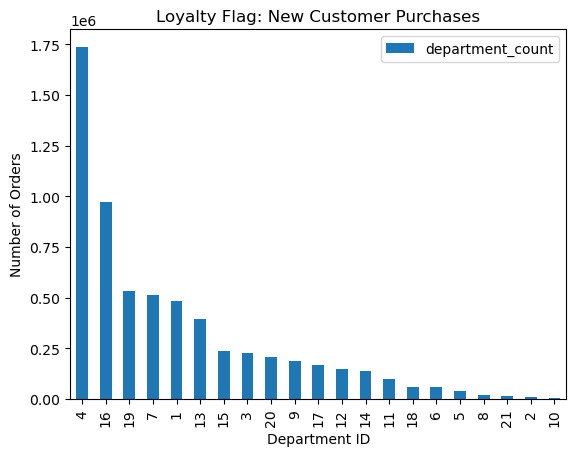

In [103]:
loyalty_flag_department_count_new_bar = loyalty_flag_department_count_new.plot.bar()
plt.title('Loyalty Flag: New Customer Purchases')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty Flag New Customer Purchases'), bbox_inches='tight')

In [104]:
spending_avg_department_count_new = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.loyalty_flag == 'New customer' ].groupby(['spending_avg']).agg(spending_avg_count=('spending_avg', 'count')).sort_values('spending_avg_count', ascending=False)

In [105]:
spending_avg_department_count_new

,spending_avg_count
spending_avg,
Low spender,6131852
High spender,114671


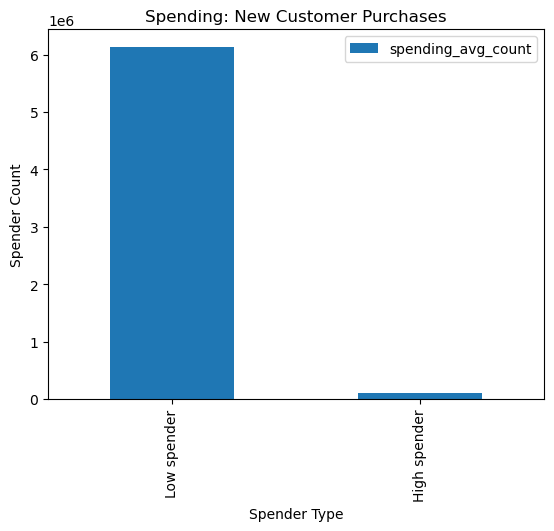

In [106]:
spending_avg_department_count_new_bar = spending_avg_department_count_new.plot.bar()
plt.title('Spending: New Customer Purchases')
plt.xlabel('Spender Type')
plt.ylabel('Spender Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending New Customer Purchases'), bbox_inches='tight')

In [107]:
loyalty_flag_department_count_regular = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.loyalty_flag == 'Regular customer' ].groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False)

In [108]:
loyalty_flag_department_count_regular

,department_count
department_id,
4,4595293
16,2604051
19,1410149
7,1320252
1,1140823
13,922819
3,570704
15,537284
20,521453


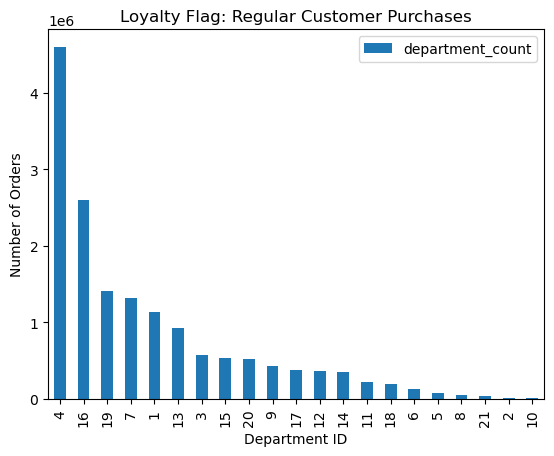

In [109]:
loyalty_flag_department_count_regular_bar = loyalty_flag_department_count_regular.plot.bar()
plt.title('Loyalty Flag: Regular Customer Purchases')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty Flag Regular Customer Purchases'), bbox_inches='tight')

In [110]:
spending_avg_department_count_regular = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.loyalty_flag == 'Regular customer' ].groupby(['spending_avg']).agg(spending_avg_count=('spending_avg', 'count')).sort_values('spending_avg_count', ascending=False)

In [111]:
spending_avg_department_count_regular

,spending_avg_count
spending_avg,
Low spender,15587970
High spender,303107


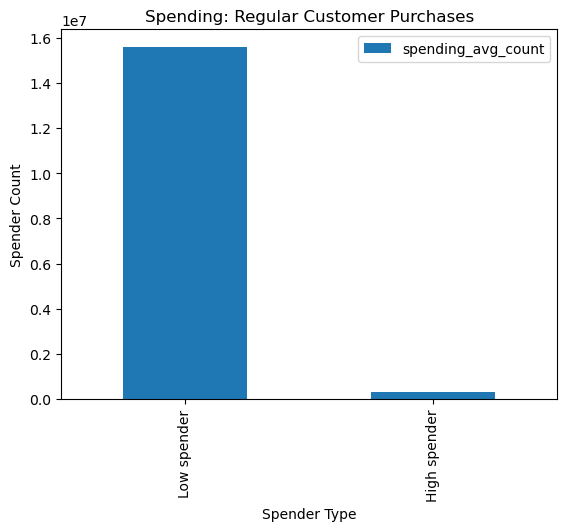

In [112]:
spending_avg_department_count_regular_bar = spending_avg_department_count_regular.plot.bar()
plt.title('Spending: Regular Customer Purchases')
plt.xlabel('Spender Type')
plt.ylabel('Spender Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Regular Customer Purchases'), bbox_inches='tight')

In [113]:
loyalty_flag_department_count_loyal = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.loyalty_flag == 'Loyal customer' ].groupby(['department_id']).agg(department_count=('department_id', 'count')).sort_values('department_count', ascending=False)

In [114]:
loyalty_flag_department_count_loyal

,department_count
department_id,
4,3147376
16,1835676
19,943150
7,855024
1,609954
13,560452
3,381686
20,324046
15,294594


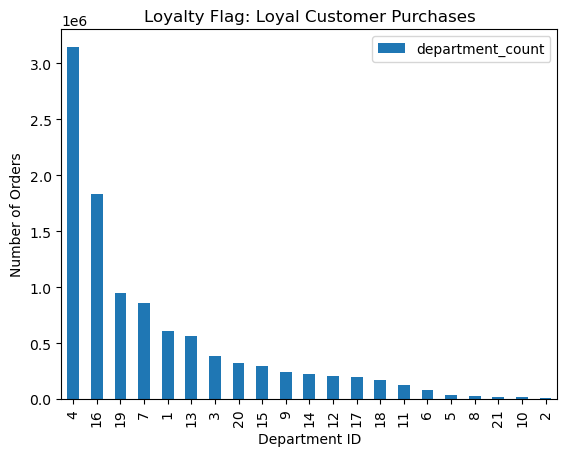

In [115]:
loyalty_flag_department_count_loyal_bar = loyalty_flag_department_count_loyal.plot.bar()
plt.title('Loyalty Flag: Loyal Customer Purchases')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty Flag Loyal Customer Purchases'), bbox_inches='tight')

In [116]:
spending_avg_department_count_loyal = df_user_stats_customers_and_orders_products[df_user_stats_customers_and_orders_products.loyalty_flag == 'Loyal customer' ].groupby(['spending_avg']).agg(spending_avg_count=('spending_avg', 'count')).sort_values('spending_avg_count', ascending=False)

In [117]:
spending_avg_department_count_loyal

,spending_avg_count
spending_avg,
Low spender,10076582
High spender,217155


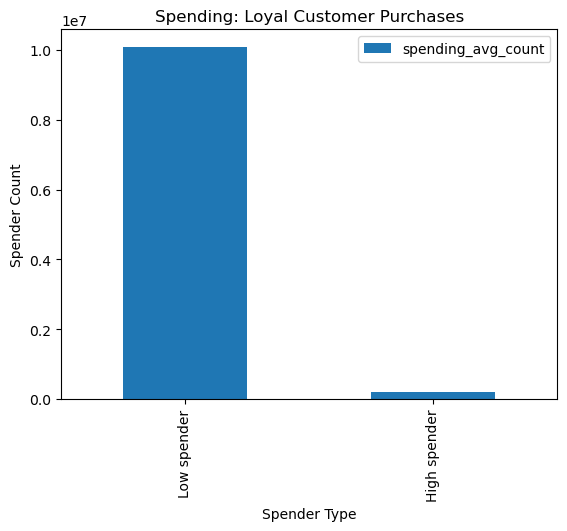

In [118]:
spending_avg_department_count_loyal_bar = spending_avg_department_count_loyal.plot.bar()
plt.title('Spending: Loyal Customer Purchases')
plt.xlabel('Spender Type')
plt.ylabel('Spender Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Loyal Customer Purchases'), bbox_inches='tight')

### Customer Profile Department Count

In [119]:
df_MPA_department = df_user_stats_customers_and_orders_products[(df_user_stats_customers_and_orders_products['customer_profile'] == 'Married Parent Adult')].groupby(['department_id']).agg(department_id_count=('department_id', 'count')).sort_values('department_id_count', ascending=False)

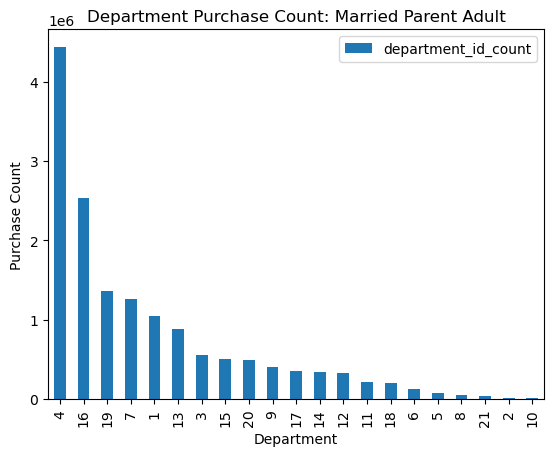

In [120]:
df_MPA_department_bar = df_MPA_department.plot.bar()
plt.title('Department Purchase Count: Married Parent Adult')
plt.xlabel('Department')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Married Parent Adult'), bbox_inches='tight')

In [121]:
df_MPS_department = df_user_stats_customers_and_orders_products[(df_user_stats_customers_and_orders_products['customer_profile'] == 'Married Parent Senior')].groupby(['department_id']).agg(department_id_count=('department_id', 'count')).sort_values('department_id_count', ascending=False)

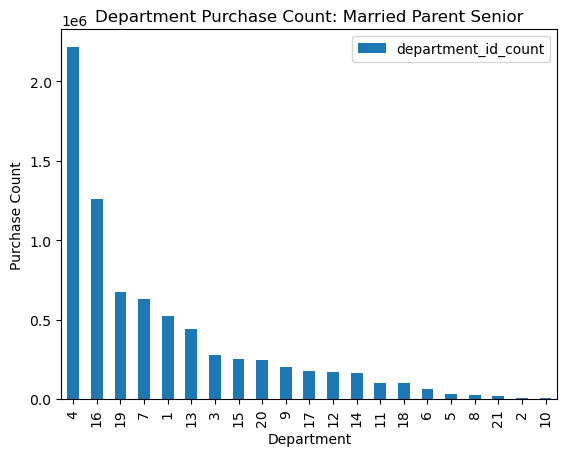

In [122]:
df_MPS_department_bar = df_MPS_department.plot.bar()
plt.title('Department Purchase Count: Married Parent Senior')
plt.xlabel('Department')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Married Parent Senior'), bbox_inches='tight')

In [123]:
df_SNA_department = df_user_stats_customers_and_orders_products[(df_user_stats_customers_and_orders_products['customer_profile'] == 'Single Non-Parent Adult')].groupby(['department_id']).agg(department_id_count=('department_id', 'count')).sort_values('department_id_count', ascending=False)

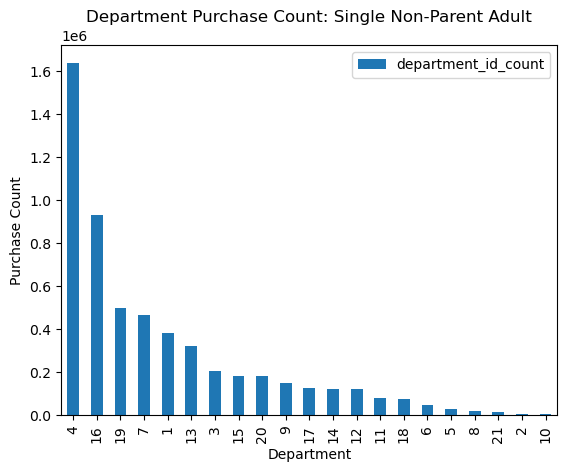

In [124]:
df_SNA_department_bar = df_SNA_department.plot.bar()
plt.title('Department Purchase Count: Single Non-Parent Adult')
plt.xlabel('Department')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Single Non-Parent Adult'), bbox_inches='tight')

In [125]:
df_SNS_department = df_user_stats_customers_and_orders_products[(df_user_stats_customers_and_orders_products['customer_profile'] == 'Single Non-Parent Senior')].groupby(['department_id']).agg(department_id_count=('department_id', 'count')).sort_values('department_id_count', ascending=False)

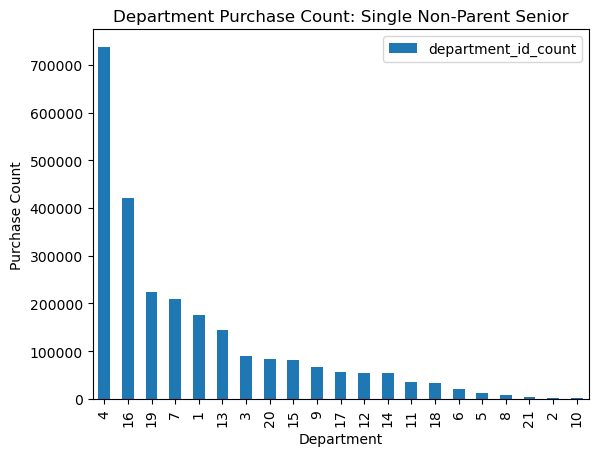

In [126]:
df_SNS_department_bar = df_SNS_department.plot.bar()
plt.title('Department Purchase Count: Single Non-Parent Senior')
plt.xlabel('Department')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Single Non-Parent Senior'), bbox_inches='tight')

In [127]:
df_SPA_department = df_user_stats_customers_and_orders_products[(df_user_stats_customers_and_orders_products['customer_profile'] == 'Single Parent Adult')].groupby(['department_id']).agg(department_id_count=('department_id', 'count')).sort_values('department_id_count', ascending=False)

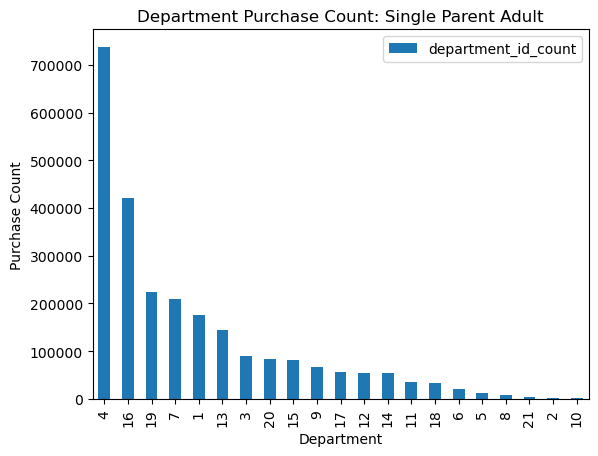

In [128]:
df_SNS_department_bar = df_SNS_department.plot.bar()
plt.title('Department Purchase Count: Single Parent Adult')
plt.xlabel('Department')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Single Parent Adult'), bbox_inches='tight')

df_hour_department_count = df_user_stats_customers_and_orders_products.groupby(['order_hour_of_day', 'department_id']).agg(department_id_count=('department_id', 'count')).sort_values('department_id_count', ascending=False)

df_hour_department_count

Hours1 = ['0', '1', '2', '3', '4', '5']

Hours2 = ['6', '7', '8', '9', '10', '11']

Hours3 = ['12', '13', '14', '15', '16', '17']

Hours4 = ['18', '19', '20', '21', '22', '23']

#Changing order_hour_of_day column to from int to string
df_user_stats_customers_and_orders_products['order_hour_of_day'] = df_user_stats_customers_and_orders_products['order_hour_of_day'].astype('str')

In [129]:
Hours1 = [0, 1, 2, 3, 4, 5]

In [130]:
Hours2 = [6, 7, 8, 9, 10, 11]

In [131]:
Hours3 = [12, 13, 14, 15, 16, 17]

In [132]:
Hours4 = [18, 19, 20, 21, 22, 23]

In [133]:
#If else statement which assigns Hours values to each list
def Hours(row):

  if row['order_hour_of_day'] in Hours1:
    return 'Hours1'
  elif row['order_hour_of_day'] in Hours2:
    return 'Hours2'
  elif row['order_hour_of_day'] in Hours3:
    return 'Hours3'
  elif row['order_hour_of_day'] in Hours4:
    return 'Hours4'
  else: return 'Not enough data'

In [134]:
#Creating new dataframe to count hours per hour
df_department_hour_period = df_user_stats_customers_and_orders_products[['department_id','order_hour_of_day']]

In [160]:
#Checking output for df_department_hour_period
df_department_hour_period.head()

,department_id,order_hour_of_day,order_hour_period
0,7,8,Hours2
1,7,7,Hours2
2,7,12,Hours3
3,7,7,Hours2
4,7,15,Hours3


In [136]:
#Creating new order hour period column
df_department_hour_period['order_hour_period'] = df_department_hour_period.apply(Hours, axis=1)

C:\Users\Alex Lam\AppData\Local\Temp\ipykernel_24100\3179730131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_department_hour_period['order_hour_period'] = df_department_hour_period.apply(Hours, axis=1)


In [137]:
df_department_period_hours1 = df_department_hour_period[df_department_hour_period.order_hour_period == 'Hours1' ].groupby('department_id').agg(order_hour_period_count = ('order_hour_period', 'count')).sort_values('order_hour_period_count', ascending=False)

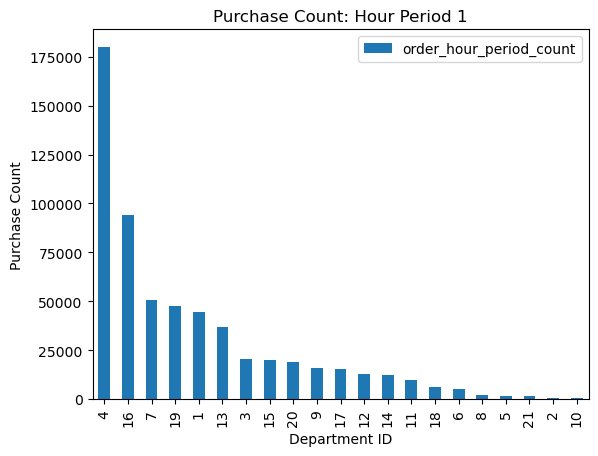

In [138]:
df_department_period_hours1.plot.bar()
plt.title('Purchase Count: Hour Period 1')
plt.xlabel('Department ID')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Purchase Count Hour Period 1'), bbox_inches='tight')

In [139]:
df_department_period_hours2 = df_department_hour_period[df_department_hour_period.order_hour_period == 'Hours2' ].groupby('department_id').agg(order_hour_period_count = ('order_hour_period', 'count')).sort_values('order_hour_period_count', ascending=False)

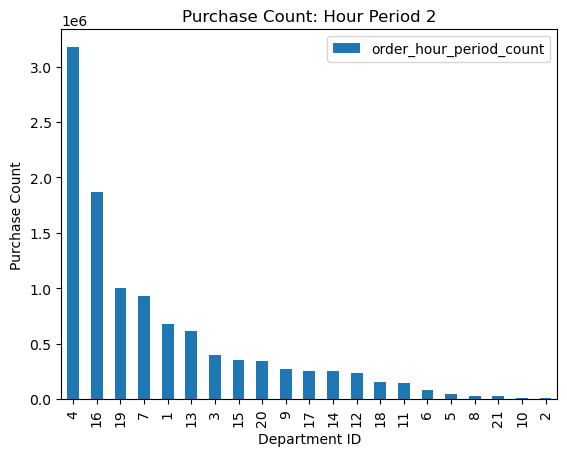

In [140]:
df_department_period_hours2.plot.bar()
plt.title('Purchase Count: Hour Period 2')
plt.xlabel('Department ID')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Purchase Count Hour Period 2'), bbox_inches='tight')

In [141]:
df_department_period_hours3 = df_department_hour_period[df_department_hour_period.order_hour_period == 'Hours3' ].groupby('department_id').agg(order_hour_period_count = ('order_hour_period', 'count')).sort_values('order_hour_period_count', ascending=False)

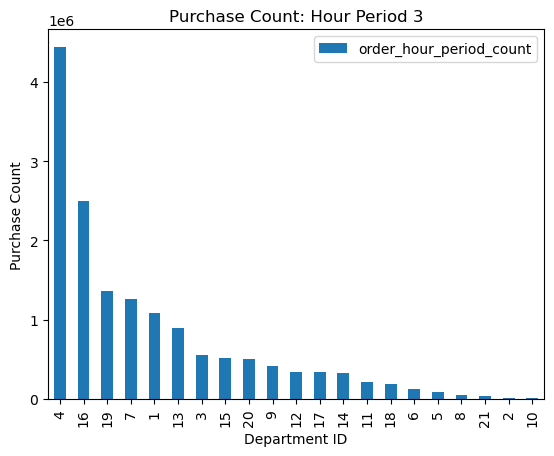

In [142]:
df_department_period_hours3.plot.bar()
plt.title('Purchase Count: Hour Period 3')
plt.xlabel('Department ID')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Purchase Count Hour Period 3'), bbox_inches='tight')

In [143]:
df_department_period_hours4 = df_department_hour_period[df_department_hour_period.order_hour_period == 'Hours4' ].groupby('department_id').agg(order_hour_period_count = ('order_hour_period', 'count')).sort_values('order_hour_period_count', ascending=False)

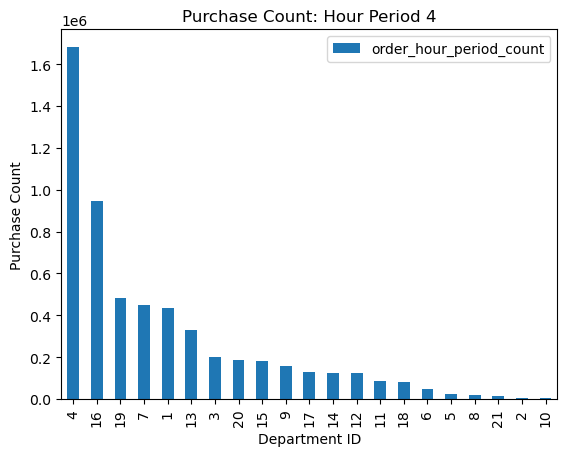

In [161]:
df_department_period_hours4.plot.bar()
plt.title('Purchase Count: Hour Period 4')
plt.xlabel('Department ID')
plt.ylabel('Purchase Count')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Purchase Count Hour Period 4'), bbox_inches='tight')

In [145]:
#Dataframe for price average based on department
df_department_price_avg = df_user_stats_customers_and_orders_products.groupby('department_id').agg(price_avg = ('prices', 'mean')).sort_values('price_avg', ascending=False)

In [146]:
df_department_price_avg

,price_avg
department_id,
16,33.408689
12,16.294489
21,8.660742
10,8.348973
5,8.144345
14,8.065548
13,8.009866
11,7.996542
4,7.981729


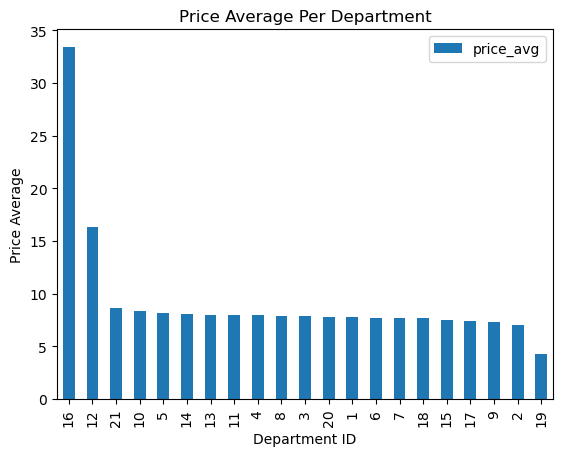

In [165]:
df_department_price_avg.plot.bar()
plt.title('Price Average Per Department')
plt.xlabel('Department ID')
plt.ylabel('Price Average')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price Average Per Department'), bbox_inches='tight')

In [167]:
#Dataframe for price average based on loyalty flag
df_loyalty_flag_price_avg = df_user_stats_customers_and_orders_products.groupby('loyalty_flag').agg(price_avg = ('prices', 'mean')).sort_values('price_avg', ascending=False)

In [169]:
df_loyalty_flag_price_avg

,price_avg
loyalty_flag,
New customer,13.281133
Regular customer,12.496203
Loyal customer,10.388747


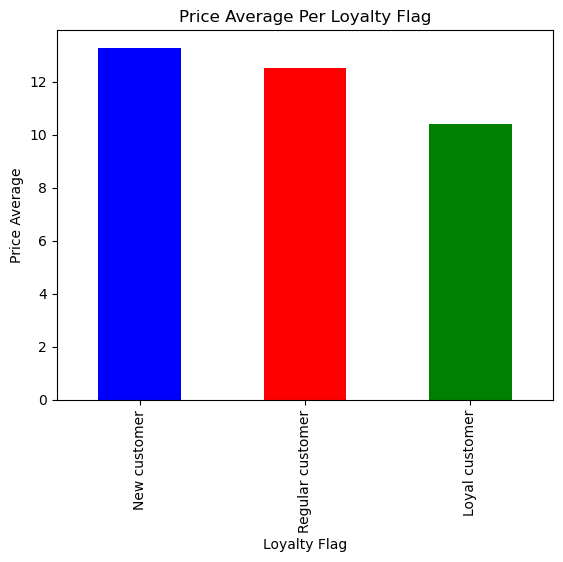

In [173]:
df_loyalty_flag_price_avg['price_avg'].plot.bar(color = ['blue', 'red', 'green'])
plt.title('Price Average Per Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Price Average')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price Average Per Loyalty Flag'), bbox_inches='tight')

## Exporting Graphs

In [148]:
customer_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer Profile Count.png'))

In [149]:
bar_customer_profile_region_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Purchase Count Based On Region.png'))

In [150]:
bar_customer_profile_loyalty_count_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty Flag Count Based On Customer Profile.png'))

In [151]:
department_id_count_region_1_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Region 1.png'))

In [152]:
department_id_count_region_2_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Region 2.png'))

In [153]:
department_id_count_region_3_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Region 3.png'))

In [154]:
department_id_count_region_4_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Region 4.png'))

In [155]:
bar_MPA_R3_dept_count_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Married Adult Parents from Region 3.png'))

In [156]:
bar_MPA_R3_day_count_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Day of the Week Count Married Adult Parents from Region 3.png'))

In [157]:
bar_No_MPA_R3_dept_count_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Purchase Count Excluding Married Adult Parents from Region 3.png'))

In [158]:
bar_No_MPA_R3_day_count_finished.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Day of the Week Count Excluding Married Adult Parents from Region 3.png'))

In [159]:
department_count_all_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department Count All Regions.png'))